In [145]:
import gudhi as gd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gudhi.representations
from datetime import timedelta
from pandas.tseries.offsets import BDay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.signal import periodogram

Loading the data

In [131]:
colnames = ['Date','Open','High', 'Low','Close']

DJIA = pd.read_csv('DJIA.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)
NASDAQ = pd.read_csv('NASDAQ.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)
Russel2000 = pd.read_csv('Russel2000.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)
SP500 = pd.read_csv('S&P500.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)

print(DJIA.head(20))

/tmp/ipykernel_30204/2015080134.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DJIA = pd.read_csv('DJIA.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)
/tmp/ipykernel_30204/2015080134.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NASDAQ = pd.read_csv('NASDAQ.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)
/tmp/ipykernel_30204/2015080134.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Russel2000 = pd.read_csv('Russel2000.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)


                Open      High       Low     Close
Date                                              
2016-12-08  19559.94  19664.97  19527.83  19614.81
2016-12-07  19241.99  19558.42  19229.83  19549.62
2016-12-06  19219.91  19255.89  19184.74  19251.78
2016-12-05  19244.35  19274.85  19186.73  19216.24
2016-12-02  19161.25  19196.14  19141.18  19170.42
2016-12-01  19149.20  19214.30  19138.79  19191.93
2016-11-30  19135.64  19225.29  19123.38  19123.58
2016-11-29  19064.07  19144.40  19062.22  19121.60
2016-11-28  19122.14  19138.72  19072.25  19097.90
2016-11-25  19093.72  19152.14  19093.72  19152.14
2016-11-23  19015.52  19083.76  19000.38  19083.18
2016-11-22  18970.39  19043.90  18962.82  19023.87
2016-11-21  18898.68  18960.76  18883.10  18956.69
2016-11-18  18905.33  18915.74  18853.83  18867.93
2016-11-17  18866.22  18904.03  18845.27  18903.82
2016-11-16  18909.85  18909.85  18825.89  18868.14
2016-11-15  18858.21  18925.26  18806.06  18923.06
2016-11-14  18876.77  18934.05 

First look at the data

In [132]:
print(DJIA.dtypes)
print(DJIA.head())
print(DJIA.info())
print(DJIA.describe())
print(DJIA['Open'].head())

Open     float64
High     float64
Low      float64
Close    float64
dtype: object
                Open      High       Low     Close
Date                                              
2016-12-08  19559.94  19664.97  19527.83  19614.81
2016-12-07  19241.99  19558.42  19229.83  19549.62
2016-12-06  19219.91  19255.89  19184.74  19251.78
2016-12-05  19244.35  19274.85  19186.73  19216.24
2016-12-02  19161.25  19196.14  19141.18  19170.42
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 2016-12-08 to 1987-12-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7301 non-null   float64
 1   High    7301 non-null   float64
 2   Low     7301 non-null   float64
 3   Close   7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB
None
               Open          High           Low         Close
count   7301.000000   7301.000000   7301.000000   7301.000000
mean    9106.946302   9187.664472   9024.536

In [133]:
print(NASDAQ.dtypes)
print(NASDAQ.head())
print(NASDAQ.info())
print(NASDAQ.describe())

Open     float64
High     float64
Low      float64
Close    float64
dtype: object
               Open     High      Low    Close
Date                                          
2016-12-08  5394.15  5425.52  5389.09  5417.36
2016-12-07  5322.67  5397.93  5307.31  5393.76
2016-12-06  5317.74  5333.99  5299.94  5333.00
2016-12-05  5283.58  5321.09  5269.57  5308.89
2016-12-02  5249.02  5274.54  5239.27  5255.65
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 2016-12-08 to 1987-12-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7301 non-null   float64
 1   High    7301 non-null   float64
 2   Low     7301 non-null   float64
 3   Close   7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB
None
              Open         High          Low        Close
count  7301.000000  7301.000000  7301.000000  7301.000000
mean   2046.870311  2061.073413  2030.224668  2046.467548
std    1308.163397  13

In [134]:
print(Russel2000.dtypes)
print(Russel2000.head())
print(Russel2000.info())
print(Russel2000.describe())

Open     float64
High     float64
Low      float64
Close    float64
dtype: object
               Open     High      Low    Close
Date                                          
2016-12-08  1364.43  1386.45  1363.70  1386.37
2016-12-07  1352.10  1366.61  1347.84  1364.51
2016-12-06  1338.05  1353.57  1334.30  1352.67
2016-12-05  1314.98  1338.23  1314.98  1337.79
2016-12-02  1313.58  1319.35  1311.52  1314.25
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 2016-12-08 to 1987-12-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7301 non-null   float64
 1   High    7301 non-null   float64
 2   Low     7301 non-null   float64
 3   Close   7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB
None
              Open         High          Low        Close
count  7301.000000  7301.000000  7301.000000  7301.000000
mean    541.717928   545.180662   537.786113   541.786253
std     310.315540   3

In [135]:
print(SP500.dtypes)
print(SP500.head())
print(SP500.info())
print(SP500.describe())

Open     float64
High     float64
Low      float64
Close    float64
dtype: object
               Open     High      Low    Close
Date                                          
2016-12-08  2241.13  2251.69  2237.57  2246.19
2016-12-07  2210.72  2241.63  2208.93  2241.35
2016-12-06  2207.26  2212.78  2202.21  2212.23
2016-12-05  2200.65  2209.42  2199.97  2204.71
2016-12-02  2191.12  2197.95  2188.37  2191.95
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 2016-12-08 to 1987-12-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7301 non-null   float64
 1   High    7301 non-null   float64
 2   Low     7301 non-null   float64
 3   Close   7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB
None
              Open         High          Low        Close
count  7301.000000  7301.000000  7301.000000  7301.000000
mean   1048.154324  1054.463034  1041.160730  1048.282880
std     515.807862   5

There is NO MISSING VALUES in any of the 4 DataFrames.
We focus on the closing prices.
We create a DataFrame "close" which contains the 4 closing columns. We sort this new DataFrame by ascending date.
We draw a few plots: one overall and 2 separated plots around the crashes dates.

In [136]:
close = pd.concat([DJIA['Close'],NASDAQ['Close'],Russel2000['Close'],SP500['Close']], axis = 1)
close.columns = ['DJIA', 'NASDAQ','Russel2000', 'SP500']
close.sort_index(inplace = True)
print(close.head())

               DJIA  NASDAQ  Russel2000   SP500
Date                                           
1987-12-23  2005.64  331.48      120.80  253.16
1987-12-24  1999.67  333.19      121.59  252.02
1987-12-28  1942.97  325.60      119.00  245.57
1987-12-29  1926.89  325.53      118.30  244.59
1987-12-30  1950.10  329.70      119.50  247.86


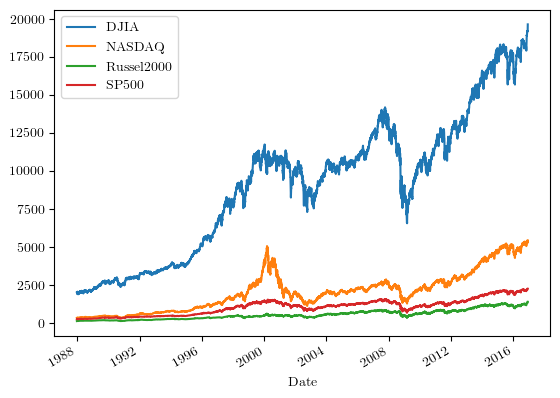

In [137]:
close.plot()
plt.show()

We are interested in the dotcom crash on 03/10/2000 and to the Lehman bankruptcy on 09/15/2008. Let's plot around these dates.

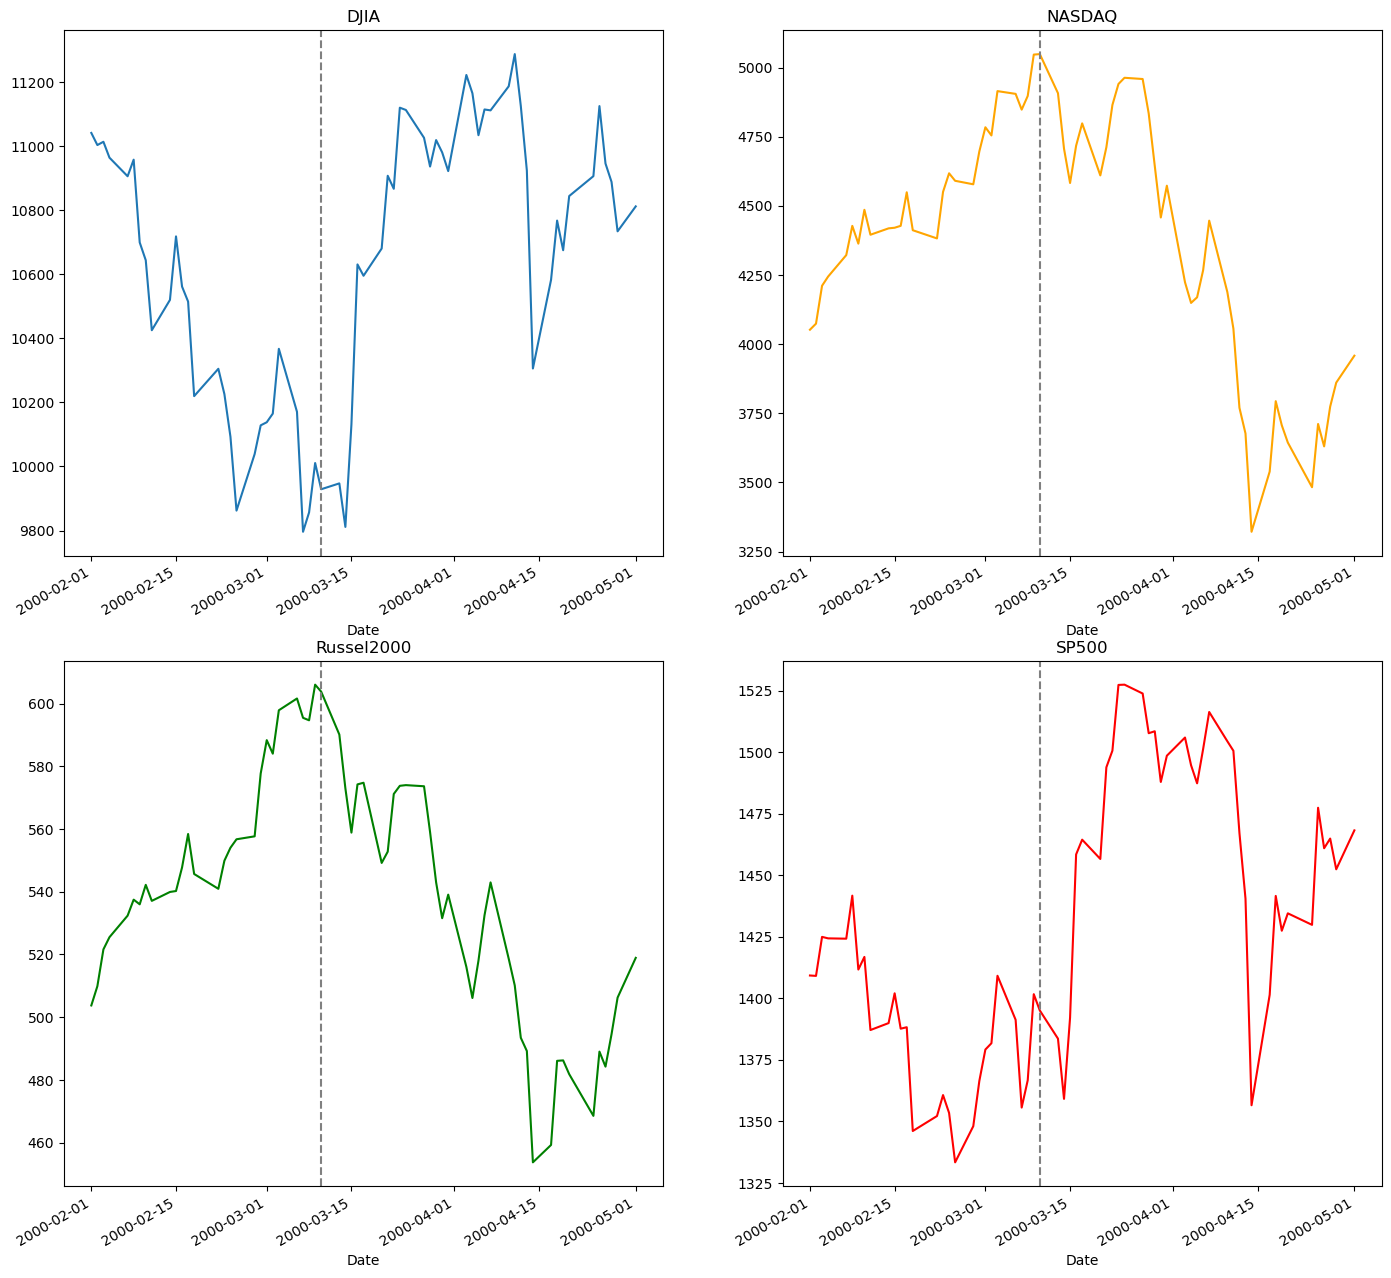

In [10]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

close['2000-02-01':'2000-05-01']['DJIA'].plot(ax = axs[0,0])
close['2000-02-01':'2000-05-01']['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
close['2000-02-01':'2000-05-01']['Russel2000'].plot(ax = axs[1,0], c = 'g')
close['2000-02-01':'2000-05-01']['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

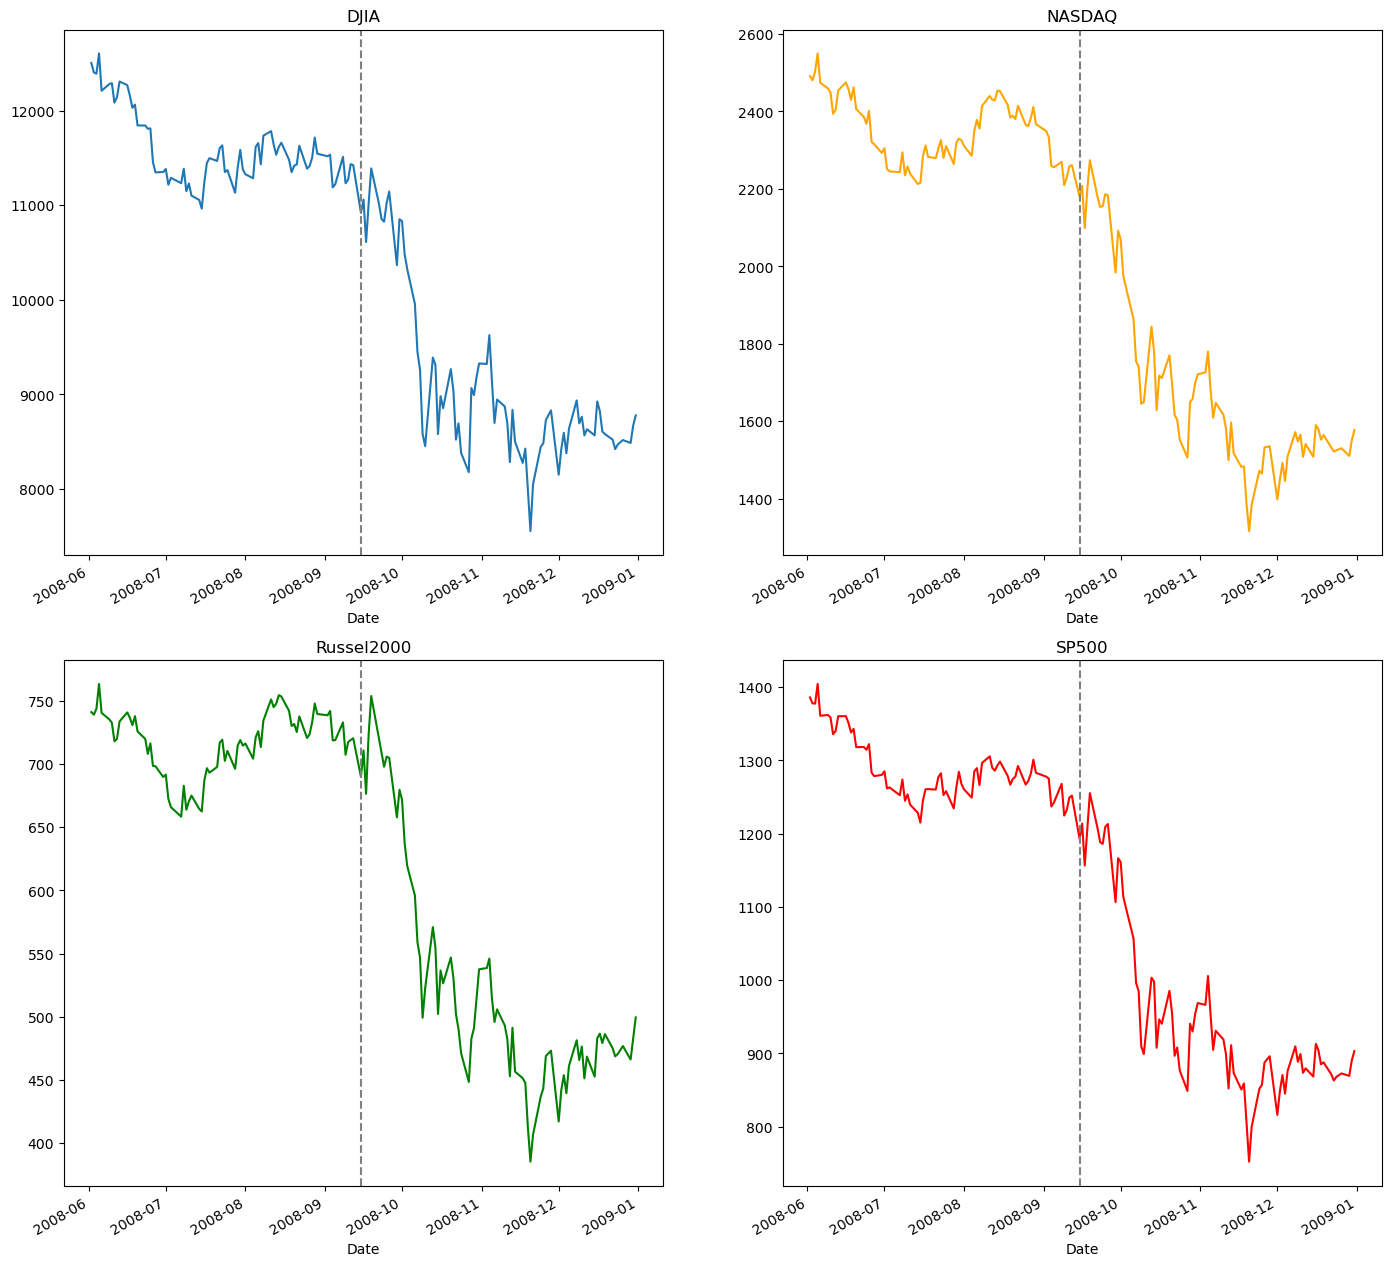

In [11]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

close['2008-06-01':'2009-01-01']['DJIA'].plot(ax = axs[0,0])
close['2008-06-01':'2009-01-01']['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
close['2008-06-01':'2009-01-01']['Russel2000'].plot(ax = axs[1,0], c = 'g')
close['2008-06-01':'2009-01-01']['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

We pass the data under a standard scaler. We have the issue that some values go to zero, so problems with $ln$. close_scaled --> ratio

Other option: apply StandardScaler to the ratio --> ratio_ln_scaled

For each index and for each trading day we calculate log-returns defined as the forward daily changes in the logarithm of the ratio $$r_{i,j} = ln(\frac{P_{i,j}}{P_{i-1,j}}),$$ where $P_{i,j}$ represents theadjusted closing value of the index $j$ at the day $i$.

We name this new DataFrame 'ratio_unscaled' and draw plots from this table.

                DJIA    NASDAQ  Russel2000     SP500
Date                                                
1987-12-23 -1.546840 -1.311466   -1.356265 -1.541200
1987-12-24 -1.548140 -1.310158   -1.353720 -1.543410
1987-12-28 -1.560488 -1.315963   -1.362064 -1.555912
1987-12-29 -1.563990 -1.316016   -1.364319 -1.557812
1987-12-30 -1.558935 -1.312827   -1.360453 -1.551473


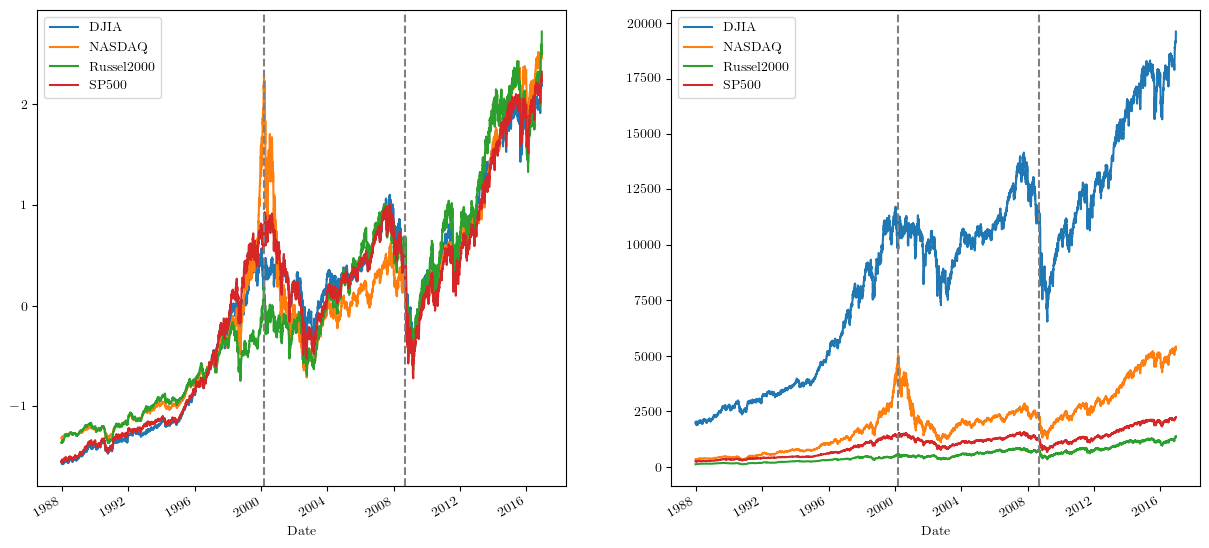

In [56]:
scaler = StandardScaler()
close_scaled = pd.DataFrame(scaler.fit_transform(close),columns = close.columns)
close_scaled.set_index(close.index, inplace = True)
print(close_scaled.head())

fig, axs = plt.subplots(1,2, figsize = (15,7))

close_scaled.plot(ax = axs[0])
close.plot(ax = axs[1])

axs[0].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
axs[0].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
axs[1].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
axs[1].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')

plt.show()

/home/alex/anaconda3/envs/gudhi/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


              DJIA       NASDAQ   Russel2000        SP500
count  7249.000000  7231.000000  7257.000000  7261.000000
mean     -0.001232     0.001152    -0.001504     0.000046
std       0.227575     0.221978     0.160167     0.182873
min      -4.874657    -4.403788    -4.202771    -3.987519
25%      -0.011659    -0.014195    -0.012532    -0.012244
50%       0.000000    -0.000177    -0.000449     0.000034
75%       0.013716     0.015787     0.014256     0.014753
max       3.863821     3.194726     3.205151     3.514721


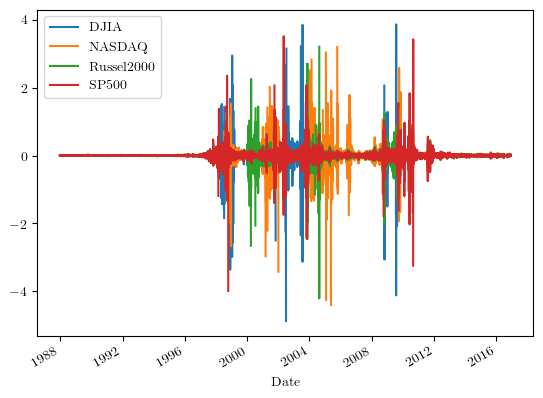

In [83]:
ratio = np.log(close_scaled.pct_change().dropna() +1)
ratio_unscaled = np.log(close.pct_change().dropna() +1)



print(ratio.describe())
ratio.plot()
plt.show()

Scaler sur les ratio plutot que les closes: censé être loi normale

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7300 entries, 1987-12-24 to 2016-12-08
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DJIA        7300 non-null   float64
 1   NASDAQ      7300 non-null   float64
 2   Russel2000  7300 non-null   float64
 3   SP500       7300 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB
None


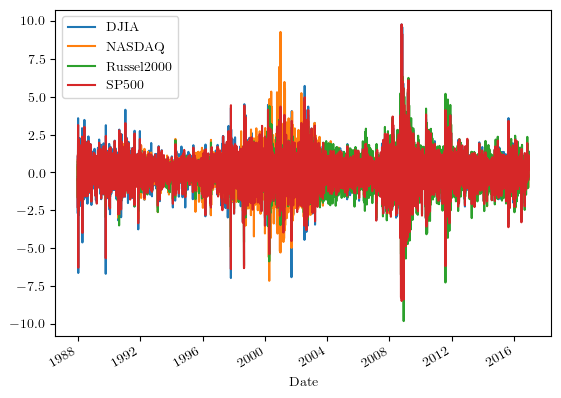

In [87]:
scaler_ln = StandardScaler()
ratio_ln_scaled = pd.DataFrame(scaler.fit_transform(ratio_unscaled),columns = close.columns)
ratio_ln_scaled.set_index(ratio_unscaled.index, inplace = True)

print(ratio_ln_scaled.info())
ratio_ln_scaled.plot()
plt.show()

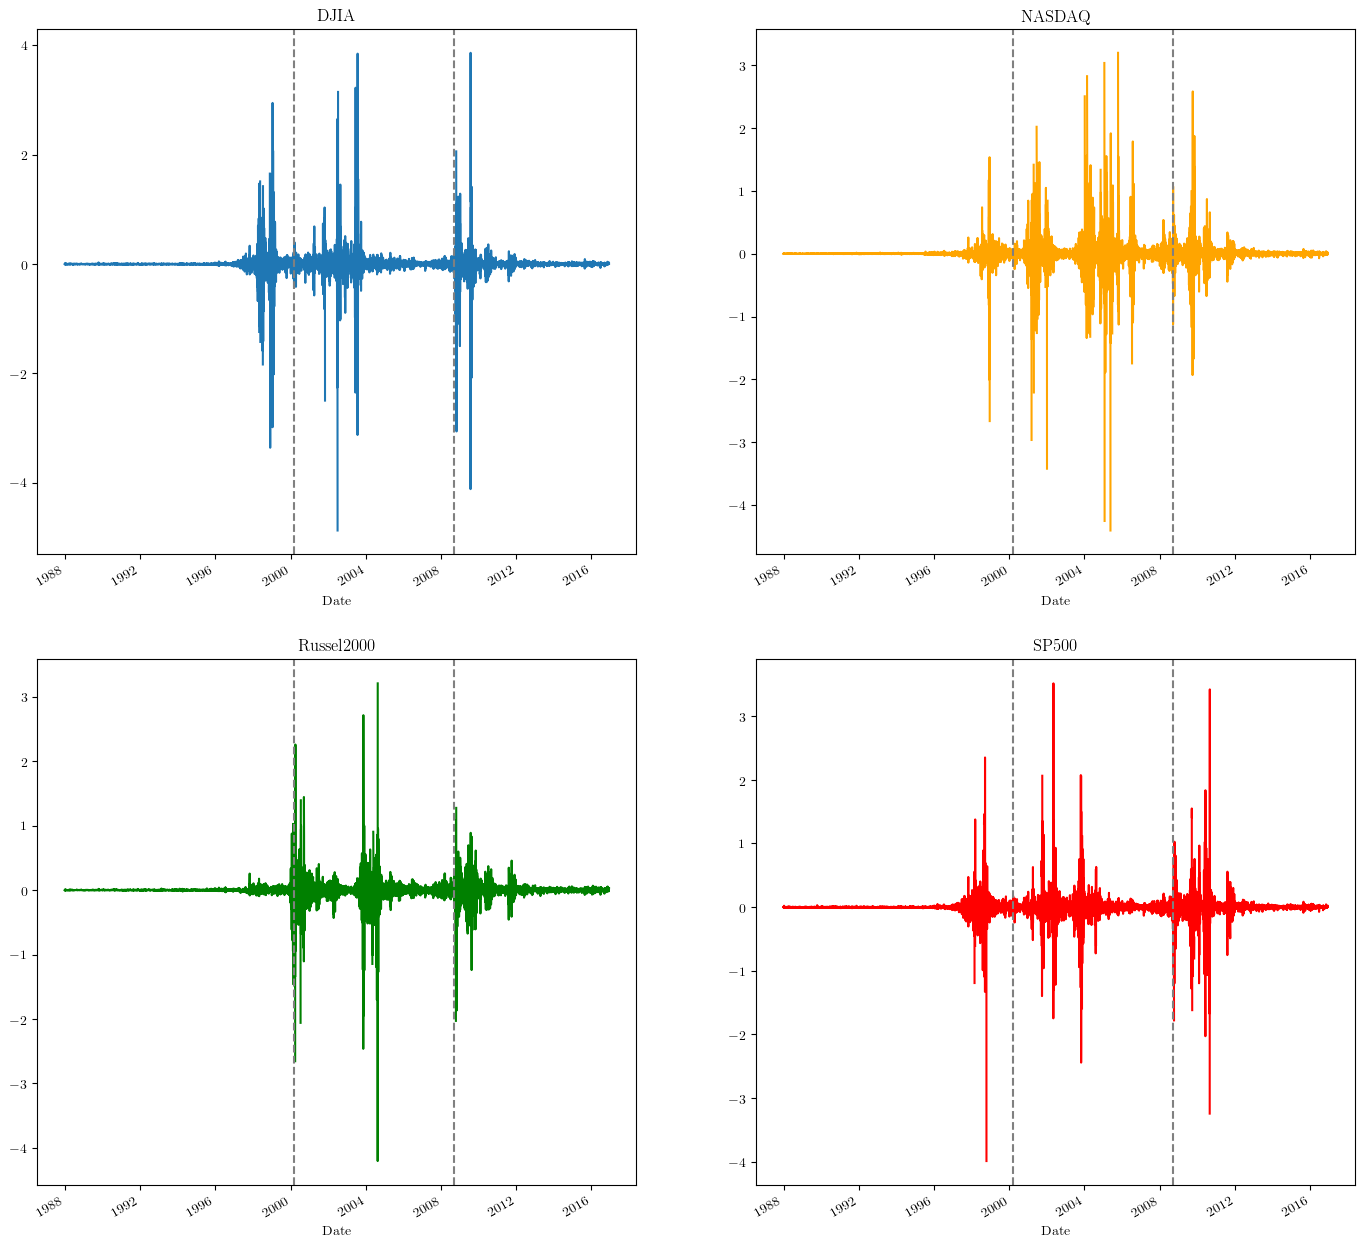

In [88]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

ratio['DJIA'].plot(ax = axs[0,0])
ratio['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
ratio['Russel2000'].plot(ax = axs[1,0], c = 'g')
ratio['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
        axs[i,j].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

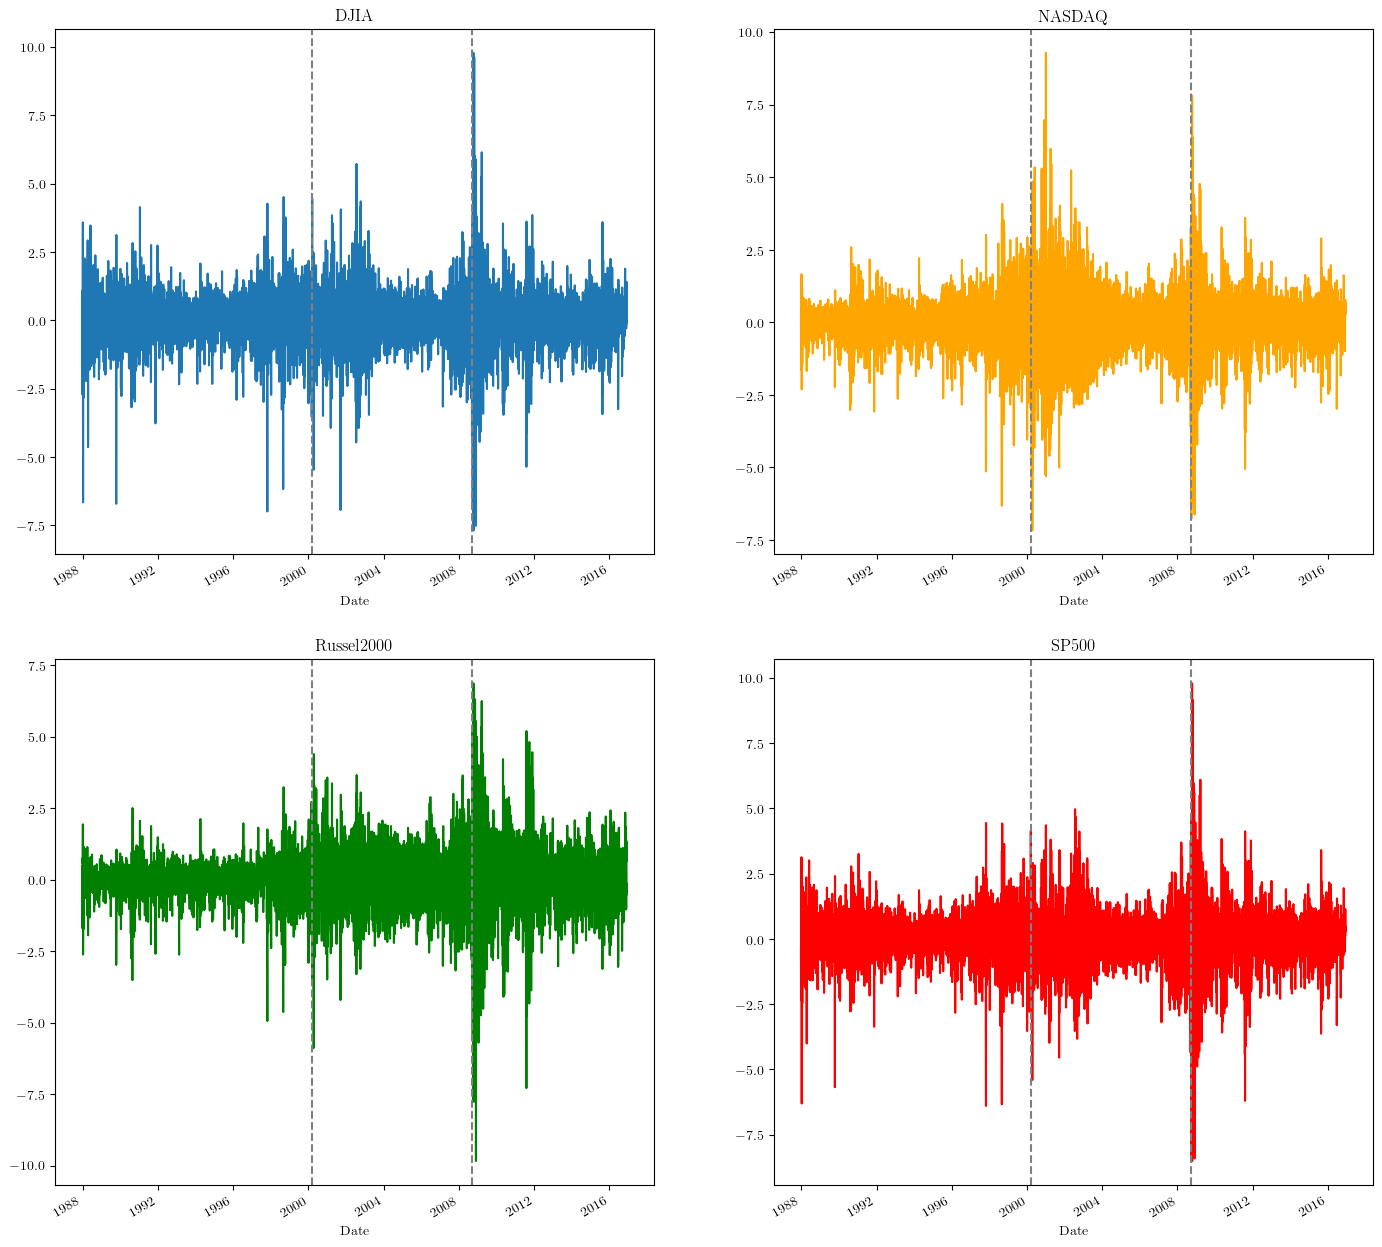

In [89]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

ratio_ln_scaled['DJIA'].plot(ax = axs[0,0])
ratio_ln_scaled['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
ratio_ln_scaled['Russel2000'].plot(ax = axs[1,0], c = 'g')
ratio_ln_scaled['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
        axs[i,j].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

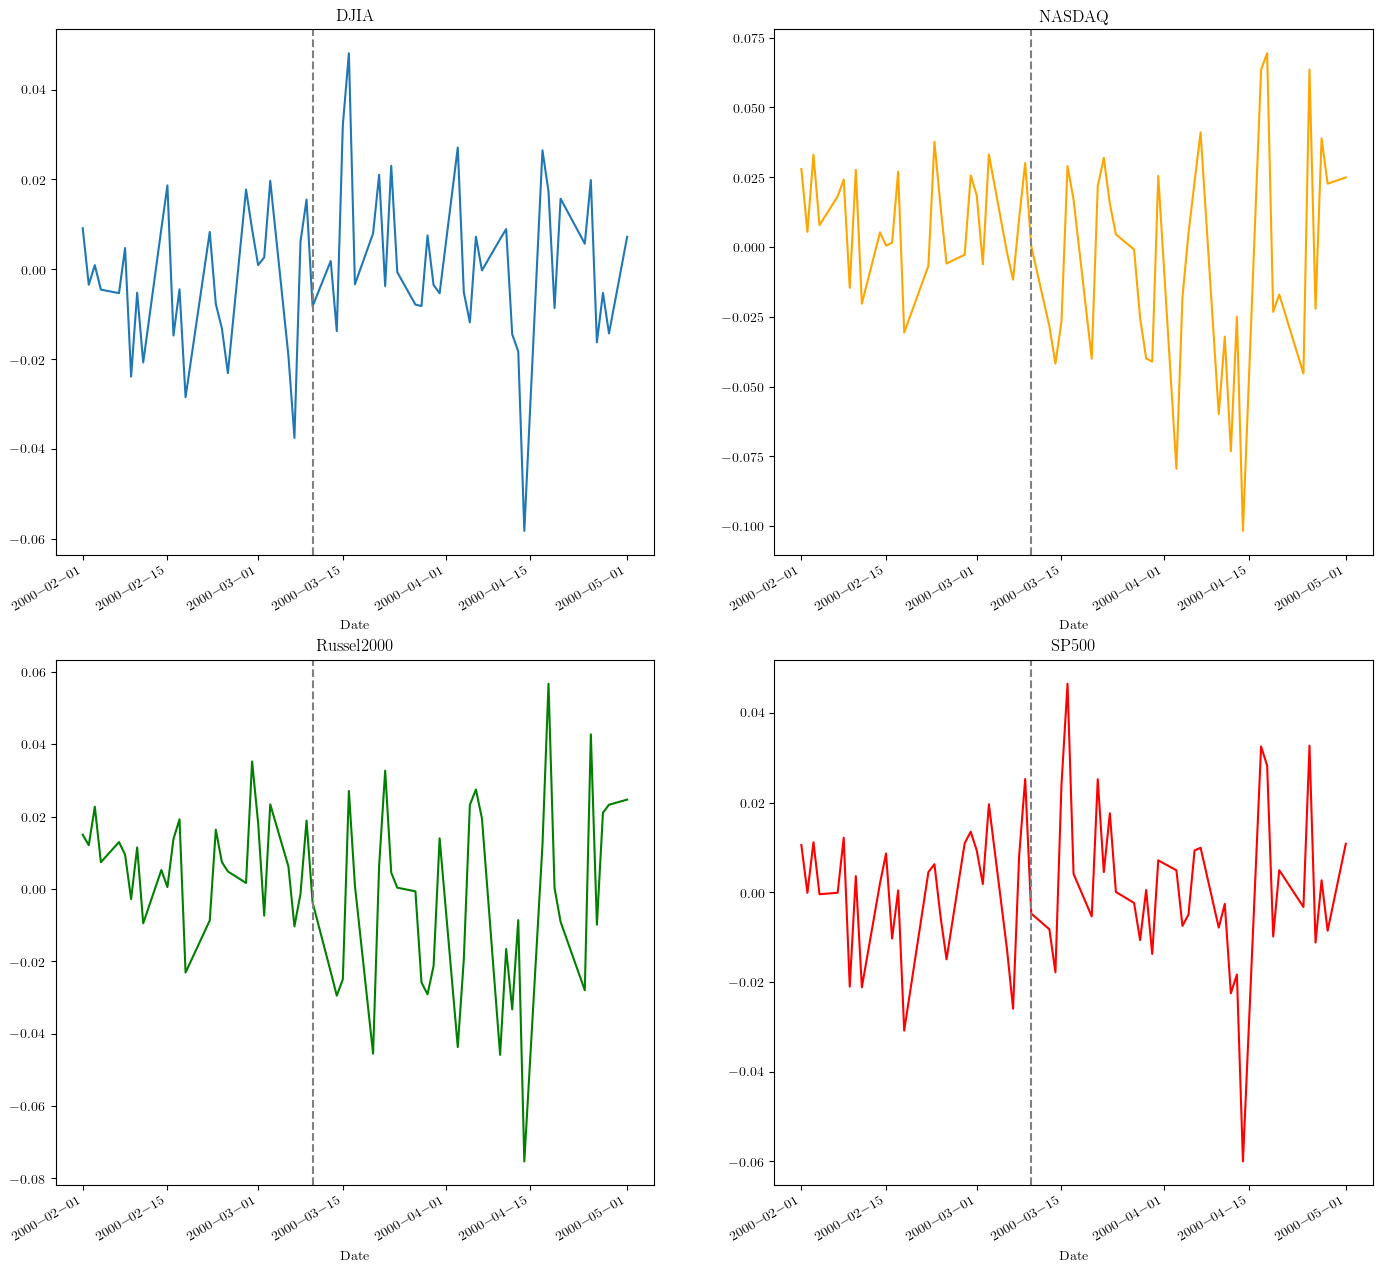

In [61]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

ratio['2000-02-01':'2000-05-01']['DJIA'].plot(ax = axs[0,0])
ratio['2000-02-01':'2000-05-01']['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
ratio['2000-02-01':'2000-05-01']['Russel2000'].plot(ax = axs[1,0], c = 'g')
ratio['2000-02-01':'2000-05-01']['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

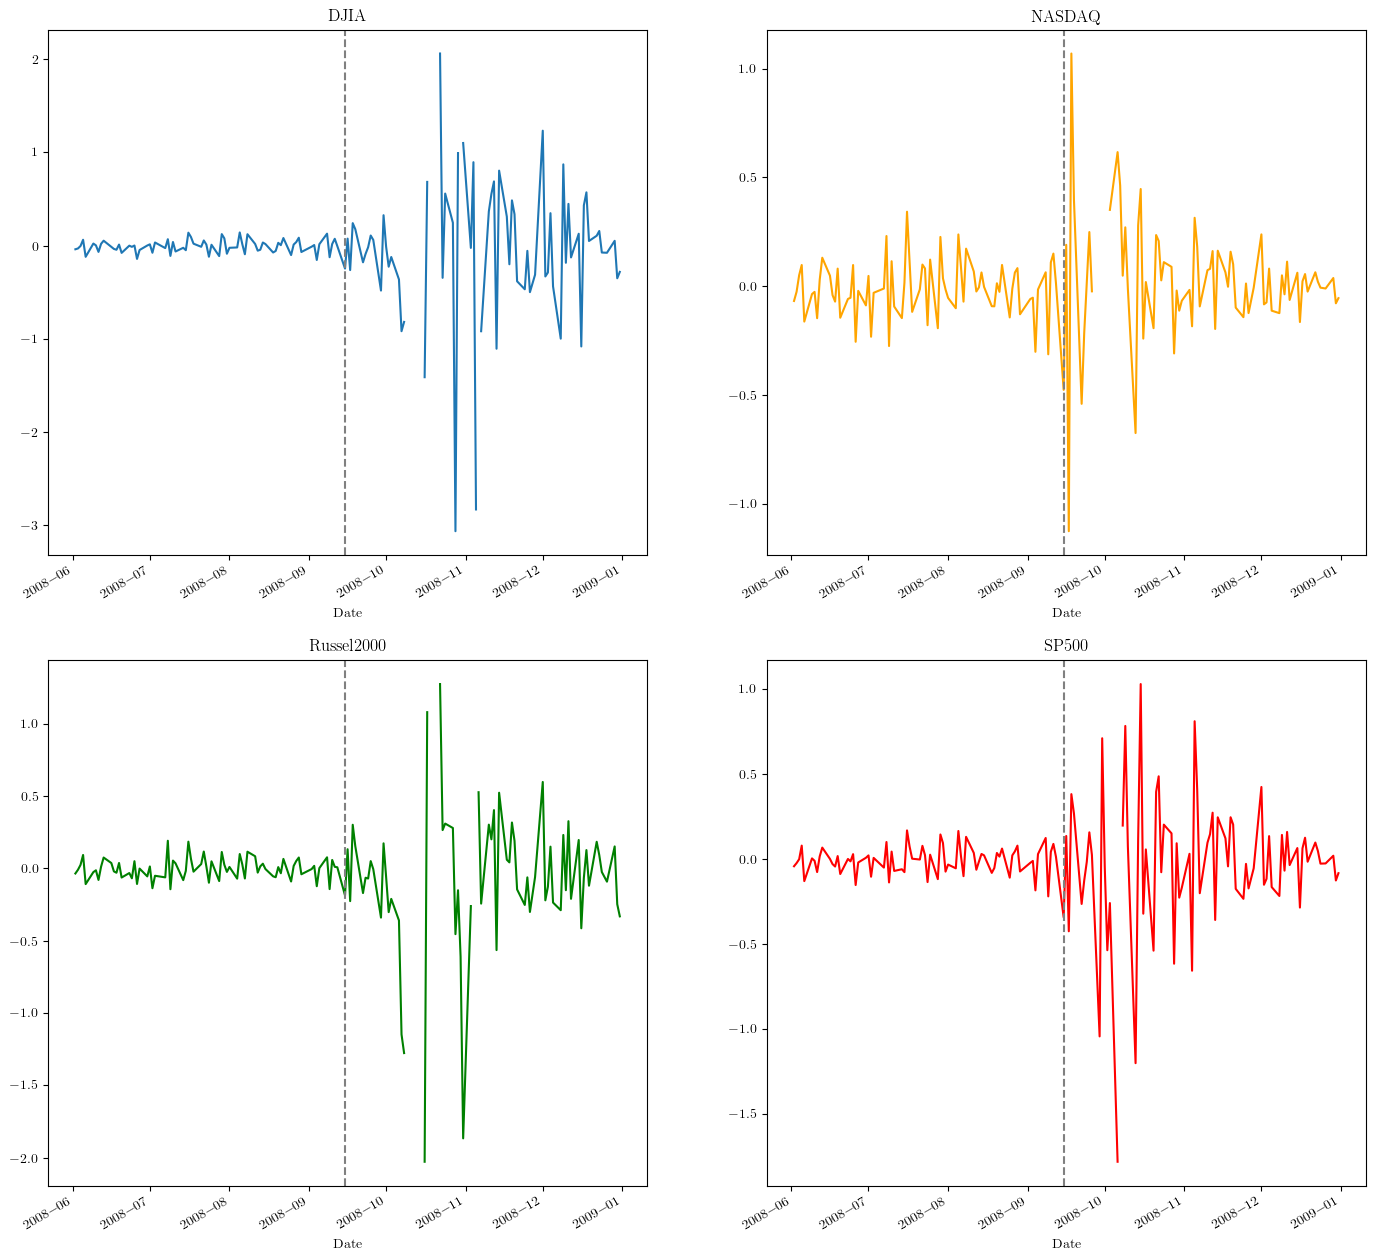

In [65]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

ratio['2008-06-01':'2009-01-01']['DJIA'].plot(ax = axs[0,0])
ratio['2008-06-01':'2009-01-01']['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
ratio['2008-06-01':'2009-01-01']['Russel2000'].plot(ax = axs[1,0], c = 'g')
ratio['2008-06-01':'2009-01-01']['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

A bit weird, we don't really notice anything happening on these plots

Let us compute persistence diagrams and persistence landscape

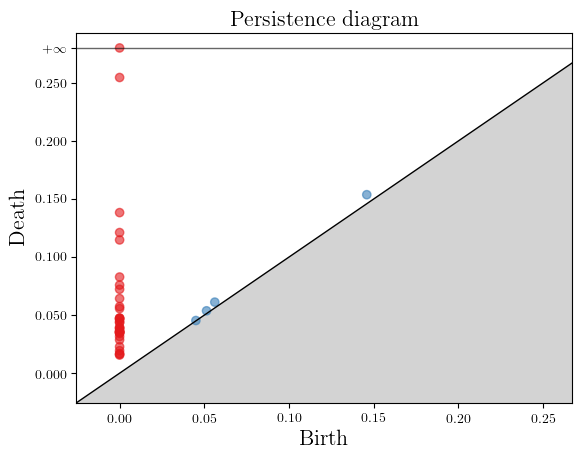

In [66]:
points = ratio['1999-11-21':'2000-01-10'].to_numpy()

skeleton = gd.RipsComplex(points = points)
Rips_tree = skeleton.create_simplex_tree(max_dimension = 4)
dgr = Rips_tree.persistence()
gd.plot_persistence_diagram(dgr)
plt.show()

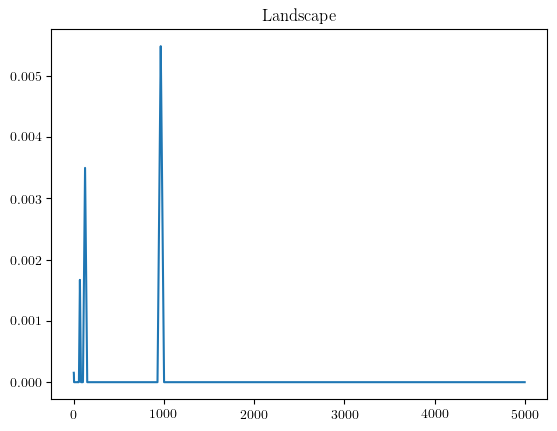

In [67]:
LS = gd.representations.Landscape(resolution=1000)
L = LS.fit_transform([Rips_tree.persistence_intervals_in_dimension(1)])


plt.title("Landscape")
plt.plot(L[0])
plt.show()


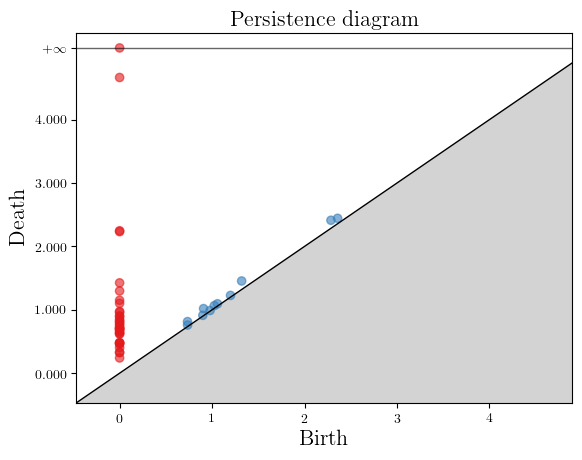

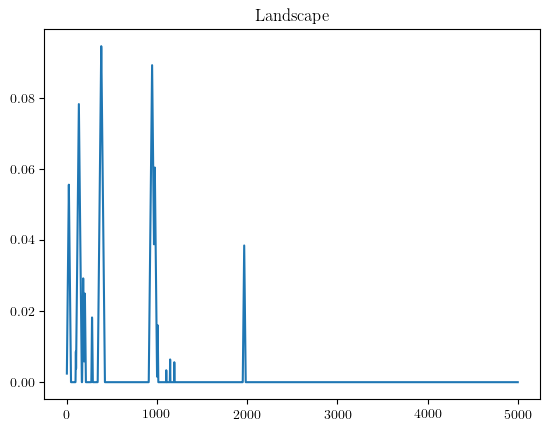

In [154]:
points = ratio_ln_scaled['1999-11-21':'2000-01-10'].to_numpy()

skeleton = gd.RipsComplex(points = points)

Rips_tree = skeleton.create_simplex_tree(max_dimension = 2)
dgr = Rips_tree.persistence()
gd.plot_persistence_diagram(dgr)
plt.show()

LS = gd.representations.Landscape(resolution=1000)
L = LS.fit_transform([Rips_tree.persistence_intervals_in_dimension(1)])


plt.title("Landscape")
plt.plot(L[0])
plt.show()


In [155]:
def computePersistenceSeq(dataset, w, p_norms):
    diagrams = {}
    for t in dataset.index[w+1:]:
        points = dataset[t-BDay(w): t].to_numpy()
        skeleton = gd.RipsComplex(points = points)
        Rips_tree = skeleton.create_simplex_tree(max_dimension = 2)
        dgr = Rips_tree.persistence()

        LS = gd.representations.Landscape()
        L = LS.fit_transform([Rips_tree.persistence_intervals_in_dimension(1)])
        
        norms = [np.linalg.norm(L[0], ord = p) for p in p_norms]

        if (t.day == 1 and t.month ==2):
            print(t)
        diagrams[t] = norms
    return diagrams
        

In [23]:
norms1_2_pers_50 = computePersistenceSeq(ratio_unscaled,50,[1,2])

In [35]:
Norms = pd.DataFrame(norms1_2_pers_50).transpose()
Norms.columns = ['L1_norm','L2_norm']
Norms.to_csv('Norms_L1_L2.csv')

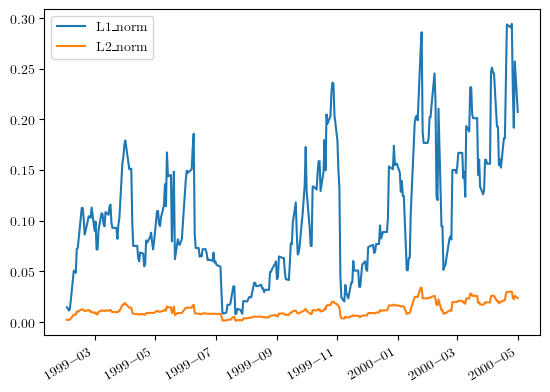

In [40]:
Norms['1999-02-01':'2000-05-01'].plot()
plt.show()

In [72]:
norms_scalled = computePersistenceSeq(ratio,50,[1,2])

1989-02-01 00:00:00
1990-02-01 00:00:00
1991-02-01 00:00:00
1993-02-01 00:00:00
1994-02-01 00:00:00
1995-02-01 00:00:00
1996-02-01 00:00:00
1999-02-01 00:00:00
2000-02-01 00:00:00
2001-02-01 00:00:00
2002-02-01 00:00:00
2005-02-01 00:00:00
2006-02-01 00:00:00
2007-02-01 00:00:00
2008-02-01 00:00:00
2010-02-01 00:00:00
2011-02-01 00:00:00
2012-02-01 00:00:00
2013-02-01 00:00:00
2016-02-01 00:00:00


In [73]:
Norms = pd.DataFrame(norms_scalled).transpose()
Norms.columns = ['L1_norm','L2_norm']
Norms.to_csv('Norms_scalled_ln.csv')

             L1_norm   L2_norm
1988-03-09  0.008325  0.001436
1988-03-10  0.008325  0.001436
1988-03-11  0.011591  0.001792
1988-03-14  0.007177  0.001388
1988-03-15  0.006878  0.001380


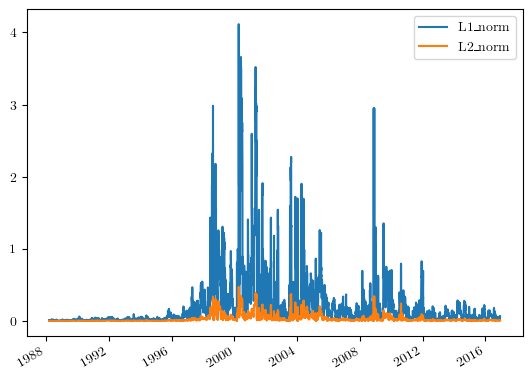

In [75]:
print(Norms.head())

Norms.plot()
plt.show()

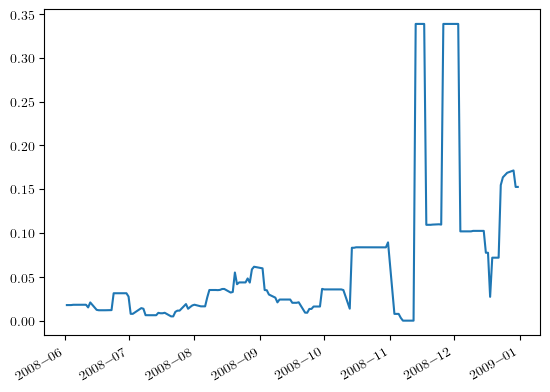

In [82]:
Norms['2008-06-01':'2009-01-01']['L2_norm'].plot()
plt.show()

In [156]:
norms_ln_test = computePersistenceSeq(ratio_ln_scaled,50,[1])

1989-02-01 00:00:00
1990-02-01 00:00:00
1991-02-01 00:00:00
1993-02-01 00:00:00
1994-02-01 00:00:00
1995-02-01 00:00:00
1996-02-01 00:00:00
1999-02-01 00:00:00
2000-02-01 00:00:00
2001-02-01 00:00:00
2002-02-01 00:00:00
2005-02-01 00:00:00
2006-02-01 00:00:00
2007-02-01 00:00:00
2008-02-01 00:00:00
2010-02-01 00:00:00
2011-02-01 00:00:00
2012-02-01 00:00:00
2013-02-01 00:00:00
2016-02-01 00:00:00


In [159]:
norms_test = pd.DataFrame(norms_ln_test).transpose()
norms_test.columns = ['L1_norm']
print(norms_test['L1_norm'].head())

1988-03-09    3.002387
1988-03-10    3.002387
1988-03-11    3.263892
1988-03-14    2.905907
1988-03-15    2.905907
Name: L1_norm, dtype: float64


In [97]:
norms_ln_scaled = computePersistenceSeq(ratio_ln_scaled,50,[1,2])
Norms_ln = pd.DataFrame(norms_ln_scaled).transpose()
Norms_ln.columns = ['L1_norm','L2_norm']
Norms_ln.to_csv('Norms_scaled.csv')

1989-02-01 00:00:00
1990-02-01 00:00:00
1991-02-01 00:00:00
1993-02-01 00:00:00
1994-02-01 00:00:00
1995-02-01 00:00:00
1996-02-01 00:00:00
1999-02-01 00:00:00
2000-02-01 00:00:00
2001-02-01 00:00:00
2002-02-01 00:00:00
2005-02-01 00:00:00
2006-02-01 00:00:00
2007-02-01 00:00:00
2008-02-01 00:00:00
2010-02-01 00:00:00
2011-02-01 00:00:00
2012-02-01 00:00:00
2013-02-01 00:00:00
2016-02-01 00:00:00


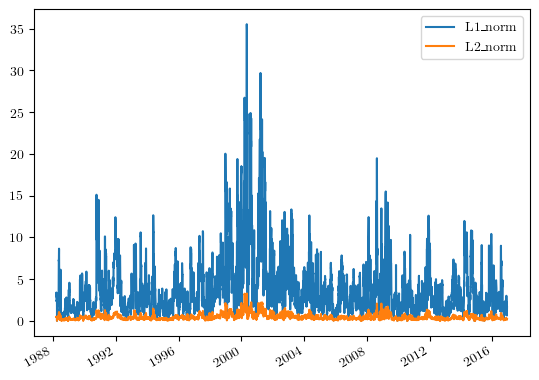

In [98]:
Norms_ln.plot()
plt.show()

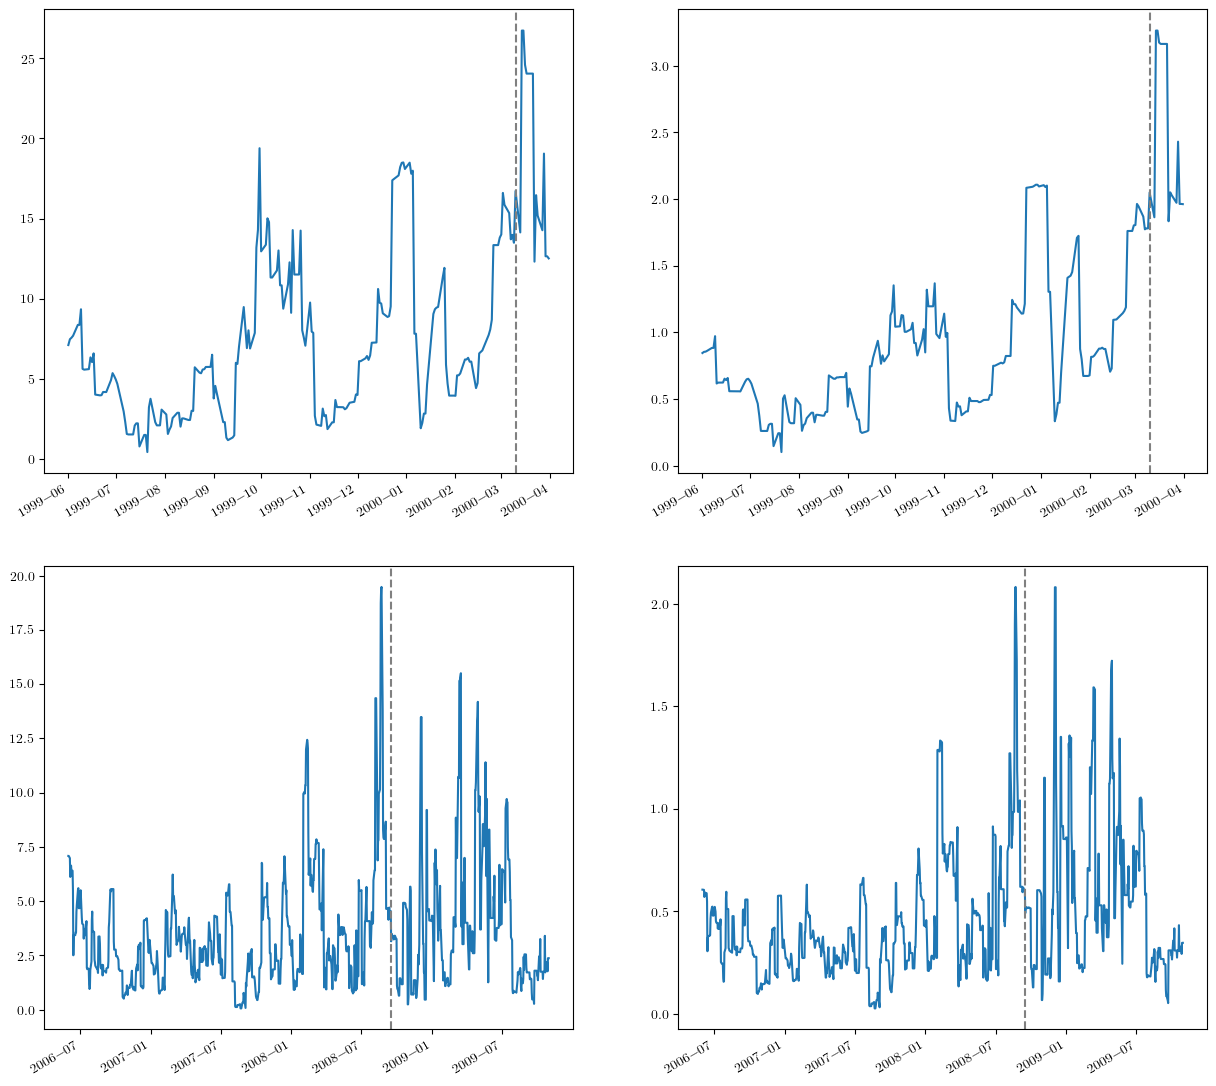

In [140]:
fig, ax = plt.subplots(2,2, figsize = (15,15))


Norms_ln['1999-06-01':'2000-04-01']['L1_norm'].plot(ax = ax[0,0])
Norms_ln['2006-06-01':'2009-11-01']['L1_norm'].plot(ax = ax[1,0])
Norms_ln['1999-06-01':'2000-04-01']['L2_norm'].plot(ax = ax[0,1])
Norms_ln['2006-06-01':'2009-11-01']['L2_norm'].plot(ax = ax[1,1])


ax[0,0].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
ax[0,1].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
ax[1,0].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
ax[1,1].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')


plt.show()

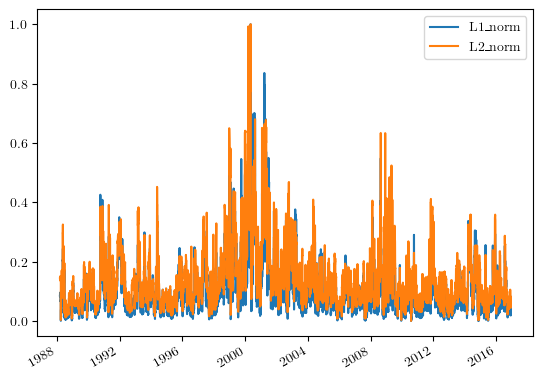

In [141]:
minmax = MinMaxScaler()
norms_normalized = pd.DataFrame(minmax.fit_transform(Norms_ln),columns = Norms_ln.columns)
norms_normalized.set_index(Norms_ln.index, inplace = True)

norms_normalized.plot()
plt.show()

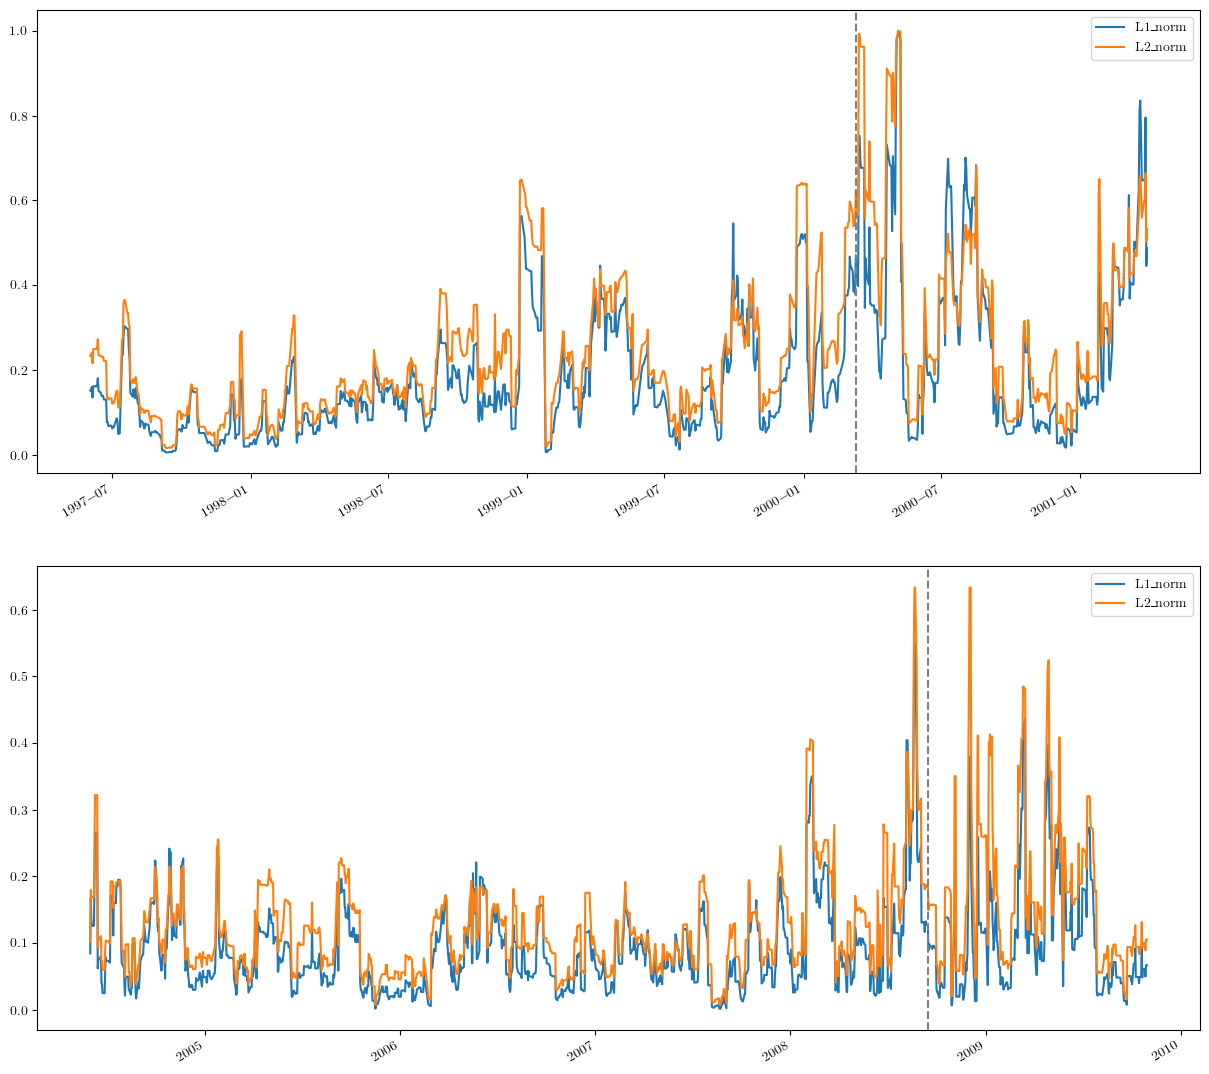

In [144]:
fig, ax = plt.subplots(2,1, figsize = (15,15))


norms_normalized['1997-06-01':'2001-04-01'].plot(ax = ax[0])
norms_normalized['2004-06-01':'2009-11-01'].plot(ax = ax[1])


ax[0].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
ax[1].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')



plt.show()

Compute the power spectral density:

$f$ contains the frquency components

$S$ is the Power Spectral Density

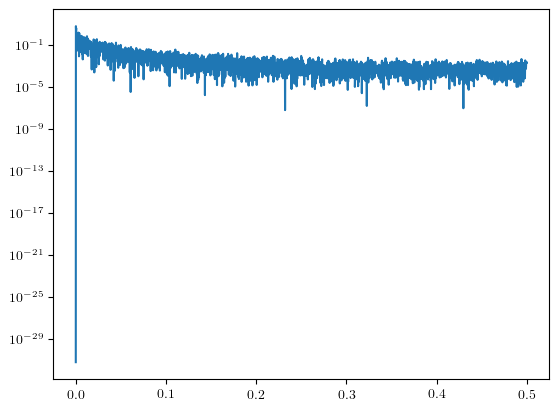

In [152]:
(f,S) = periodogram(norms_normalized['L1_norm'], scaling = 'density')
plt.semilogy(f,S)
plt.show()

We now compute these on rolling windows and filter to only keep low frequencies